In [7]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [8]:
data=[]
with open('diabetes.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        data.append(row)
        

In [9]:
data=np.array(data)
data=data[1:,:]


In [10]:
x=data[:,:8].astype(float)
y=data[:,8].astype(float)

In [12]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3)
scaler=MinMaxScaler()
scaler.fit(train_x)

MinMaxScaler()

In [14]:
scaler.transform(train_x)
scaler.transform(test_x)

array([[0.17647059, 0.50251256, 0.59649123, ..., 0.39205955, 0.37190436,
        0.11666667],
       [0.05882353, 0.58291457, 0.68421053, ..., 0.44789082, 0.17847993,
        0.06666667],
       [0.17647059, 0.42211055, 0.63157895, ..., 0.46153846, 0.08070026,
        0.11666667],
       ...,
       [0.11764706, 0.54271357, 0.54385965, ..., 0.31265509, 0.02134927,
        0.        ],
       [0.64705882, 0.51758794, 0.59649123, ..., 0.57320099, 0.0204953 ,
        0.35      ],
       [0.05882353, 0.68341709, 0.64912281, ..., 0.46401985, 0.13706234,
        0.05      ]])

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

I:\anaconda\envs\ai\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
I:\anaconda\envs\ai\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
I:\anaconda\envs\ai\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
I:\anaconda\envs\ai\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1ty

In [25]:
model=Sequential()
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [26]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy","mse"])

In [27]:
stop=EarlyStopping(monitor='val_loss',patience=30,verbose=1,mode='min')

In [28]:
model.fit(train_x,train_y,verbose=1,batch_size=64,callbacks=[stop],epochs=700,validation_data=(test_x,test_y)) 

Train on 1400 samples, validate on 600 samples
Epoch 1/700
1400/1400 [==============================] - 0s 236us/sample - loss: 2.6765 - acc: 0.4350 - mean_squared_error: 0.4951 - val_loss: 1.0673 - val_acc: 0.4900 - val_mean_squared_error: 0.3488
Epoch 2/700
1400/1400 [==============================] - 0s 116us/sample - loss: 0.9476 - acc: 0.5786 - mean_squared_error: 0.2977 - val_loss: 0.8240 - val_acc: 0.6183 - val_mean_squared_error: 0.2759
Epoch 3/700
1400/1400 [==============================] - 0s 121us/sample - loss: 0.8072 - acc: 0.5864 - mean_squared_error: 0.2776 - val_loss: 0.7475 - val_acc: 0.6117 - val_mean_squared_error: 0.2601
Epoch 4/700
1400/1400 [==============================] - 0s 127us/sample - loss: 0.7433 - acc: 0.5929 - mean_squared_error: 0.2618 - val_loss: 0.7230 - val_acc: 0.6283 - val_mean_squared_error: 0.2527
Epoch 5/700
1400/1400 [==============================] - 0s 119us/sample - loss: 0.7205 - acc: 0.6014 - mean_squared_error: 0.2553 - val_loss: 0.6873

1400/1400 [==============================] - 0s 103us/sample - loss: 0.5622 - acc: 0.7079 - mean_squared_error: 0.1899 - val_loss: 0.5838 - val_acc: 0.6900 - val_mean_squared_error: 0.1988
Epoch 42/700
1400/1400 [==============================] - 0s 93us/sample - loss: 0.5686 - acc: 0.6950 - mean_squared_error: 0.1932 - val_loss: 0.5603 - val_acc: 0.7150 - val_mean_squared_error: 0.1893
Epoch 43/700
1400/1400 [==============================] - 0s 94us/sample - loss: 0.5622 - acc: 0.7036 - mean_squared_error: 0.1903 - val_loss: 0.5606 - val_acc: 0.7050 - val_mean_squared_error: 0.1898
Epoch 44/700
1400/1400 [==============================] - 0s 95us/sample - loss: 0.5557 - acc: 0.7050 - mean_squared_error: 0.1875 - val_loss: 0.5595 - val_acc: 0.7033 - val_mean_squared_error: 0.1896
Epoch 45/700
1400/1400 [==============================] - 0s 90us/sample - loss: 0.5569 - acc: 0.7079 - mean_squared_error: 0.1884 - val_loss: 0.5568 - val_acc: 0.7050 - val_mean_squared_error: 0.1881
Epoch 4

Epoch 82/700
1400/1400 [==============================] - 0s 96us/sample - loss: 0.5171 - acc: 0.7529 - mean_squared_error: 0.1724 - val_loss: 0.5250 - val_acc: 0.7567 - val_mean_squared_error: 0.1749
Epoch 83/700
1400/1400 [==============================] - 0s 90us/sample - loss: 0.5213 - acc: 0.7393 - mean_squared_error: 0.1741 - val_loss: 0.5223 - val_acc: 0.7533 - val_mean_squared_error: 0.1748
Epoch 84/700
1400/1400 [==============================] - 0s 112us/sample - loss: 0.5227 - acc: 0.7414 - mean_squared_error: 0.1753 - val_loss: 0.5205 - val_acc: 0.7450 - val_mean_squared_error: 0.1741
Epoch 85/700
1400/1400 [==============================] - 0s 99us/sample - loss: 0.5161 - acc: 0.7621 - mean_squared_error: 0.1717 - val_loss: 0.5188 - val_acc: 0.7617 - val_mean_squared_error: 0.1728
Epoch 86/700
1400/1400 [==============================] - 0s 112us/sample - loss: 0.5151 - acc: 0.7514 - mean_squared_error: 0.1719 - val_loss: 0.5185 - val_acc: 0.7583 - val_mean_squared_error: 

1400/1400 [==============================] - 0s 91us/sample - loss: 0.4903 - acc: 0.7721 - mean_squared_error: 0.1623 - val_loss: 0.4956 - val_acc: 0.7633 - val_mean_squared_error: 0.1640
Epoch 123/700
1400/1400 [==============================] - 0s 87us/sample - loss: 0.4896 - acc: 0.7679 - mean_squared_error: 0.1621 - val_loss: 0.5032 - val_acc: 0.7733 - val_mean_squared_error: 0.1661
Epoch 124/700
1400/1400 [==============================] - 0s 99us/sample - loss: 0.4914 - acc: 0.7707 - mean_squared_error: 0.1625 - val_loss: 0.4963 - val_acc: 0.7650 - val_mean_squared_error: 0.1644
Epoch 125/700
1400/1400 [==============================] - 0s 113us/sample - loss: 0.4926 - acc: 0.7664 - mean_squared_error: 0.1634 - val_loss: 0.5227 - val_acc: 0.7650 - val_mean_squared_error: 0.1728
Epoch 126/700
1400/1400 [==============================] - 0s 114us/sample - loss: 0.4990 - acc: 0.7543 - mean_squared_error: 0.1663 - val_loss: 0.5017 - val_acc: 0.7450 - val_mean_squared_error: 0.1657
Ep

1400/1400 [==============================] - 0s 94us/sample - loss: 0.4803 - acc: 0.7643 - mean_squared_error: 0.1589 - val_loss: 0.4954 - val_acc: 0.7617 - val_mean_squared_error: 0.1626
Epoch 163/700
1400/1400 [==============================] - 0s 111us/sample - loss: 0.4772 - acc: 0.7714 - mean_squared_error: 0.1580 - val_loss: 0.4819 - val_acc: 0.7817 - val_mean_squared_error: 0.1580
Epoch 164/700
1400/1400 [==============================] - 0s 109us/sample - loss: 0.4730 - acc: 0.7593 - mean_squared_error: 0.1565 - val_loss: 0.4782 - val_acc: 0.7650 - val_mean_squared_error: 0.1585
Epoch 165/700
1400/1400 [==============================] - 0s 112us/sample - loss: 0.4759 - acc: 0.7650 - mean_squared_error: 0.1573 - val_loss: 0.4712 - val_acc: 0.7850 - val_mean_squared_error: 0.1546
Epoch 166/700
1400/1400 [==============================] - 0s 110us/sample - loss: 0.4705 - acc: 0.7693 - mean_squared_error: 0.1550 - val_loss: 0.4803 - val_acc: 0.7867 - val_mean_squared_error: 0.1571


1400/1400 [==============================] - 0s 116us/sample - loss: 0.4582 - acc: 0.7736 - mean_squared_error: 0.1506 - val_loss: 0.4606 - val_acc: 0.7683 - val_mean_squared_error: 0.1519
Epoch 203/700
1400/1400 [==============================] - 0s 110us/sample - loss: 0.4563 - acc: 0.7779 - mean_squared_error: 0.1506 - val_loss: 0.4543 - val_acc: 0.7817 - val_mean_squared_error: 0.1487
Epoch 204/700
1400/1400 [==============================] - 0s 102us/sample - loss: 0.4567 - acc: 0.7829 - mean_squared_error: 0.1502 - val_loss: 0.4533 - val_acc: 0.7867 - val_mean_squared_error: 0.1484
Epoch 205/700
1400/1400 [==============================] - 0s 91us/sample - loss: 0.4503 - acc: 0.7871 - mean_squared_error: 0.1480 - val_loss: 0.4536 - val_acc: 0.7917 - val_mean_squared_error: 0.1482
Epoch 206/700
1400/1400 [==============================] - 0s 89us/sample - loss: 0.4558 - acc: 0.7714 - mean_squared_error: 0.1499 - val_loss: 0.4542 - val_acc: 0.7783 - val_mean_squared_error: 0.1488
E

1400/1400 [==============================] - 0s 89us/sample - loss: 0.4407 - acc: 0.7857 - mean_squared_error: 0.1442 - val_loss: 0.4423 - val_acc: 0.7933 - val_mean_squared_error: 0.1450
Epoch 243/700
1400/1400 [==============================] - 0s 89us/sample - loss: 0.4435 - acc: 0.7779 - mean_squared_error: 0.1464 - val_loss: 0.4413 - val_acc: 0.7867 - val_mean_squared_error: 0.1437
Epoch 244/700
1400/1400 [==============================] - 0s 92us/sample - loss: 0.4400 - acc: 0.7764 - mean_squared_error: 0.1447 - val_loss: 0.4432 - val_acc: 0.7917 - val_mean_squared_error: 0.1448
Epoch 245/700
1400/1400 [==============================] - 0s 104us/sample - loss: 0.4458 - acc: 0.7764 - mean_squared_error: 0.1468 - val_loss: 0.4388 - val_acc: 0.7800 - val_mean_squared_error: 0.1443
Epoch 246/700
1400/1400 [==============================] - 0s 111us/sample - loss: 0.4396 - acc: 0.7893 - mean_squared_error: 0.1439 - val_loss: 0.4525 - val_acc: 0.8000 - val_mean_squared_error: 0.1476
Ep

1400/1400 [==============================] - 0s 95us/sample - loss: 0.4314 - acc: 0.7836 - mean_squared_error: 0.1421 - val_loss: 0.4302 - val_acc: 0.7833 - val_mean_squared_error: 0.1412
Epoch 283/700
1400/1400 [==============================] - 0s 89us/sample - loss: 0.4276 - acc: 0.7907 - mean_squared_error: 0.1401 - val_loss: 0.4322 - val_acc: 0.7867 - val_mean_squared_error: 0.1420
Epoch 284/700
1400/1400 [==============================] - 0s 108us/sample - loss: 0.4338 - acc: 0.7864 - mean_squared_error: 0.1423 - val_loss: 0.4372 - val_acc: 0.7917 - val_mean_squared_error: 0.1429
Epoch 285/700
1400/1400 [==============================] - 0s 106us/sample - loss: 0.4305 - acc: 0.7836 - mean_squared_error: 0.1414 - val_loss: 0.4699 - val_acc: 0.7900 - val_mean_squared_error: 0.1527
Epoch 286/700
1400/1400 [==============================] - 0s 114us/sample - loss: 0.4263 - acc: 0.7914 - mean_squared_error: 0.1397 - val_loss: 0.4291 - val_acc: 0.7933 - val_mean_squared_error: 0.1404
E

1400/1400 [==============================] - 0s 119us/sample - loss: 0.4222 - acc: 0.7979 - mean_squared_error: 0.1380 - val_loss: 0.4209 - val_acc: 0.7917 - val_mean_squared_error: 0.1378
Epoch 323/700
1400/1400 [==============================] - 0s 119us/sample - loss: 0.4195 - acc: 0.7929 - mean_squared_error: 0.1377 - val_loss: 0.4289 - val_acc: 0.8067 - val_mean_squared_error: 0.1397
Epoch 324/700
1400/1400 [==============================] - 0s 100us/sample - loss: 0.4182 - acc: 0.7943 - mean_squared_error: 0.1373 - val_loss: 0.4250 - val_acc: 0.7867 - val_mean_squared_error: 0.1411
Epoch 325/700
1400/1400 [==============================] - 0s 94us/sample - loss: 0.4369 - acc: 0.7886 - mean_squared_error: 0.1444 - val_loss: 0.4225 - val_acc: 0.7833 - val_mean_squared_error: 0.1387
Epoch 326/700
1400/1400 [==============================] - 0s 93us/sample - loss: 0.4213 - acc: 0.7979 - mean_squared_error: 0.1378 - val_loss: 0.4303 - val_acc: 0.8067 - val_mean_squared_error: 0.1397
E

1400/1400 [==============================] - 0s 123us/sample - loss: 0.4147 - acc: 0.7971 - mean_squared_error: 0.1363 - val_loss: 0.4219 - val_acc: 0.7917 - val_mean_squared_error: 0.1396
Epoch 363/700
1400/1400 [==============================] - 0s 91us/sample - loss: 0.4156 - acc: 0.7950 - mean_squared_error: 0.1364 - val_loss: 0.4228 - val_acc: 0.8133 - val_mean_squared_error: 0.1376
Epoch 364/700
1400/1400 [==============================] - 0s 101us/sample - loss: 0.4121 - acc: 0.8029 - mean_squared_error: 0.1349 - val_loss: 0.4311 - val_acc: 0.8050 - val_mean_squared_error: 0.1397
Epoch 365/700
1400/1400 [==============================] - 0s 112us/sample - loss: 0.4128 - acc: 0.8036 - mean_squared_error: 0.1349 - val_loss: 0.4137 - val_acc: 0.7850 - val_mean_squared_error: 0.1359
Epoch 366/700
1400/1400 [==============================] - 0s 111us/sample - loss: 0.4116 - acc: 0.7943 - mean_squared_error: 0.1353 - val_loss: 0.4209 - val_acc: 0.8050 - val_mean_squared_error: 0.1369


1400/1400 [==============================] - 0s 124us/sample - loss: 0.4114 - acc: 0.8014 - mean_squared_error: 0.1350 - val_loss: 0.4103 - val_acc: 0.7933 - val_mean_squared_error: 0.1343
Epoch 403/700
1400/1400 [==============================] - 0s 136us/sample - loss: 0.4082 - acc: 0.7971 - mean_squared_error: 0.1344 - val_loss: 0.4606 - val_acc: 0.7967 - val_mean_squared_error: 0.1471
Epoch 404/700
1400/1400 [==============================] - 0s 116us/sample - loss: 0.4133 - acc: 0.8000 - mean_squared_error: 0.1350 - val_loss: 0.4260 - val_acc: 0.8033 - val_mean_squared_error: 0.1384
Epoch 405/700
1400/1400 [==============================] - 0s 110us/sample - loss: 0.4085 - acc: 0.7986 - mean_squared_error: 0.1339 - val_loss: 0.4206 - val_acc: 0.8067 - val_mean_squared_error: 0.1364
Epoch 406/700
1400/1400 [==============================] - 0s 125us/sample - loss: 0.4055 - acc: 0.8021 - mean_squared_error: 0.1328 - val_loss: 0.4107 - val_acc: 0.8167 - val_mean_squared_error: 0.1330

<AxesSubplot:>

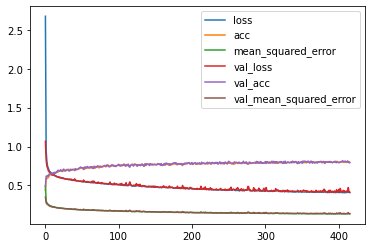

In [29]:
import pandas as pd
graph=pd.DataFrame(model.history.history)
graph.plot()

In [30]:
model.save("modelx.h5")